#Synthetic 2D Dataset

LOAD THE DATASET

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
# to load the dataset call pd.read_csv() function
# and mention the path of the dataset file, seperator and header of the file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DATA CLUSTERING/Synthetic 2_d datasets/Aggregation_k=7.txt", sep="\t", header=None)
df

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [ ]:
df.head()# to display only first 5 records of the data

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [ ]:
# storing x, y and ground truth labels to different variables
x, y, labels = df[0], df[1], df[2]

Plot the 2D dataset

In [ ]:
import matplotlib.pyplot as plt
import random as rd

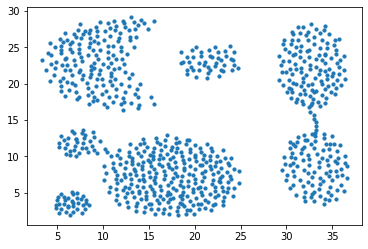

In [ ]:
plt.scatter(x, y, s = 10)
plt.show()

In [ ]:
classes = set(labels)
classes

{1, 2, 3, 4, 5, 6, 7}

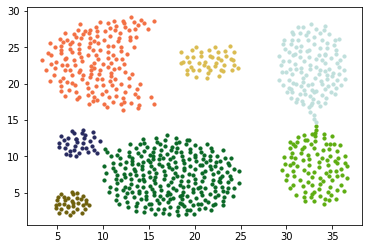

In [ ]:
# plot the data with true labels
colors = []
i = 0
for class_name in classes:
  colors.append((rd.random(), rd.random(), rd.random()))
  plt.scatter(x[labels == class_name], y[labels == class_name], color = colors[i], s = 10)
  i += 1
plt.show()

K-Means Algorithm

In [ ]:
k = len(classes) # number of clusters
n, f = df.shape # n is total number of datapoints and f is total number of dimensions/features
f = f - 1
plot_each_step = False
max_iterations = 10
k, n, f

(7, 788, 2)

In [ ]:
# function which initializes centroids randomly
def init_centroids(df, k, n, f):
  max_values = df.max()
  min_values = df.min()
  centroids = np.random.rand(k, f) * np.full((k, f), np.array(max_values - min_values)) + np.full((k, f), np.array(min_values))
  return centroids

In [ ]:
# calculating distance between two data points A and B
def cal_distance(A, B):
  return math.sqrt(np.sum((A - B) ** 2))

In [ ]:
def my_kmeans(data, k, n, f, centroids, max_iterations = 10, plot_each_step = False, error = 0):
  # plot initial centroids which are selected randomly
  if plot_each_step:
    plt.title("Initial centroids")
    plt.scatter(data[:, 0], data[:, 1], s = 10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color = "red", s = 200)
    plt.show()



  clusters = np.zeros(n, dtype='int')
  for iter_no in range(max_iterations): # iterates for maximum number of iterations
    # assigning closest centeroid to each data point
    for i in range(n):
      clusters[i] = 0
      for cluster_no in range(k):
        temp_dist = cal_distance(data[i], centroids[cluster_no])
        if cluster_no == 0:
          dist = temp_dist
        if temp_dist < dist:
          dist = temp_dist
          clusters[i] = cluster_no # assign new cluster, if value of distance for new centroid is less than previous centroid
    
    
    
    
    # finding the new centroids by taking the mean value
    new_centroids = np.zeros((k, f))
    for cluster_no in range(k):
      points = np.array([data[i] for i in range(len(data)) if clusters[i] == cluster_no])
      new_centroids[cluster_no] = np.mean(points, axis = 0)
      if plot_each_step and len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], color = colors[cluster_no], s = 10)
    
    # calculating difference between previous centroids and new centroids
    diff = cal_distance(new_centroids, centroids)
    # print(centroids, new_centroids, diff)
    diff = round(diff, 2)
    # if there is no change in the previous centroids and new centroids then loop will terminated
    # scatter plot of each iteration
    if plot_each_step:
      plt.title("result after iteration " + str(iter_no))
      plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = "*", s = 200, color = "red")
      plt.show()
    if diff <= error:
      break
    centroids = new_centroids
  return clusters + 1, centroids

In [ ]:
# extract only features part of the data
df1 = df.iloc[:, :-1]
# covert the data into numpy array
data = np.array(df1)
data[:10]

array([[15.55, 28.65],
       [14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       [13.75, 28.05],
       [13.35, 28.45],
       [13.  , 29.15],
       [13.45, 27.5 ],
       [13.6 , 26.5 ],
       [12.8 , 27.35]])

initial centroids are selected as:
 [[34.3822665   2.42694498]
 [35.48138647  4.90428858]
 [ 7.07640402 20.0066406 ]
 [ 6.80916734  6.13067487]
 [ 5.87557176 20.49800314]
 [ 7.99388575 13.41851601]
 [31.77391034 16.99291228]]


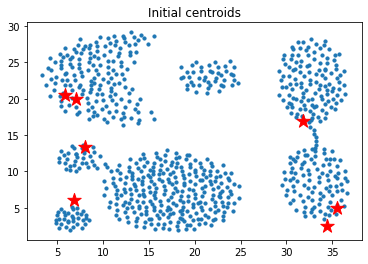

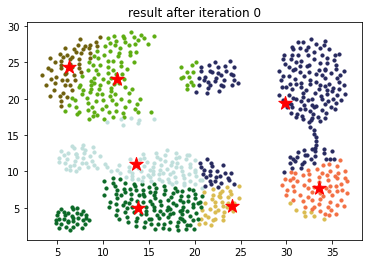

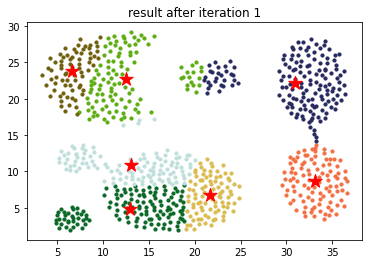

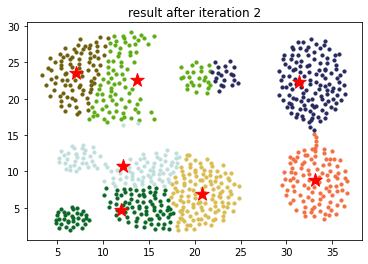

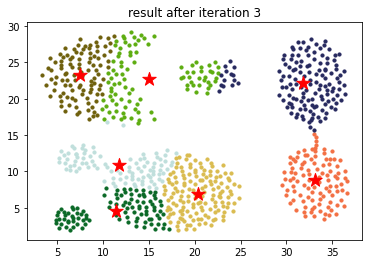

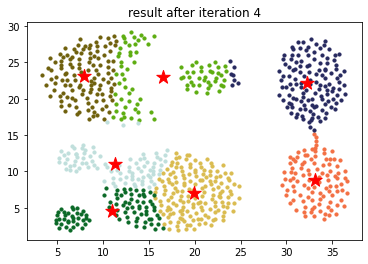

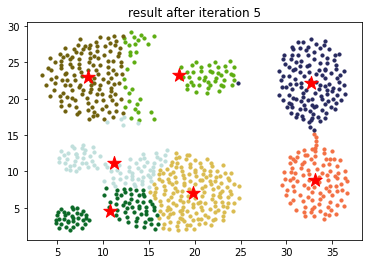

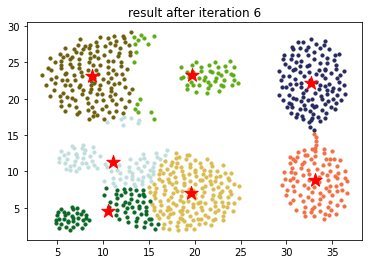

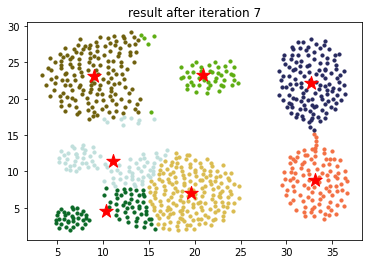

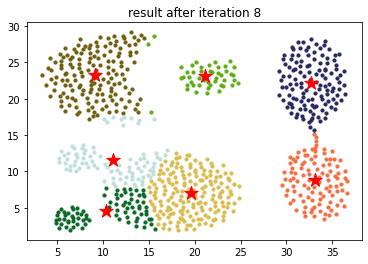

In [ ]:
initial_centroids = init_centroids(df1, k, n, f)
print("initial centroids are selected as:\n", initial_centroids)
# call my_kmeans function to get final clusters
clusters, centroids = my_kmeans(data, k, n, f, initial_centroids, max_iterations=20, error = 0.5, plot_each_step=True)

In [ ]:
#final centroids of the clusters
centroids

array([[19.54361111,  6.96472222],
       [33.14278846,  8.79375   ],
       [20.874     , 23.334     ],
       [10.35670732,  4.51219512],
       [ 9.00833333, 23.18557692],
       [11.03181818, 11.49829545],
       [32.69453125, 22.13789062]])

The above function **my_kmeans()** may not be give proper output for some cases because it is possible that initial centroids may not be choosen properly. In that case try to run the kmeans algo again. Also make sure that initial centroids should be distrubuted over space properly.

# Real Dataset

In [ ]:
# load the dataset using pandas
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DATA CLUSTERING/Real datasets/iris2_k=3.txt", sep=",", header=None)
df2.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [ ]:
# extract only features part of the data
df3 = df2.iloc[:, :-1]
# covert the data into numpy array
data3 = np.array(df3)
data3[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# extract the ground truth labels / actual labels
actual_labels = np.array(df2.iloc[:, -1])
actual_labels[:5]

array([1, 1, 1, 1, 1])

In [ ]:
classes = set(actual_labels)
classes

{1, 2, 3}

APPLY K-MEANS

In [ ]:
# initialise the number of clusters, features and data points
k1 = len(classes) # number of clusters
n1, f1 = df2.shape # n1 is total number of datapoints and f1 is total number of dimensions/features
f1 = f1 - 1
max_iterations = 20
k1, n1, f1

(3, 150, 4)

In [ ]:
initial_centroids = init_centroids(df3, k1, n1, f1)
print("initial centroids selected as:\n", np.around(initial_centroids, decimals=2))
predicted_labels, centroids = my_kmeans(data3, k1, n1, f1, initial_centroids, max_iterations=20, error=0)
print("Final centroids are selected as:\n", np.around(centroids, decimals=2))

initial centroids selected as:
 [[6.8  2.45 5.82 1.1 ]
 [5.23 4.09 4.27 1.71]
 [4.43 3.81 2.08 2.35]]
Final centroids are selected as:
 [[6.85 3.08 5.72 2.05]
 [5.88 2.74 4.39 1.43]
 [5.01 3.42 1.46 0.24]]


In python to apply k means clustering algorithm you can also use **sklearn** machine learning library. 

In [ ]:
# k means clustering using sklearn library
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [ ]:
# Instantiating Kmeans
kmeans = KMeans(n_clusters=k1, init='k-means++')

# Learning from the Data
kmeans.fit(data3)

# Predictions
predicted_labels_sklearn = kmeans.predict(data3)
print("Final centroids selected by sklearn.kmeans are:\n", np.around(kmeans.cluster_centers_, decimals=2))

Final centroids selected by sklearn.kmeans are:
 [[6.85 3.07 5.74 2.07]
 [5.01 3.42 1.46 0.24]
 [5.9  2.75 4.39 1.43]]


In [ ]:
len(predicted_labels), len(predicted_labels_sklearn), len(actual_labels)

(150, 150, 150)

Clustering Performance Analysis

In [ ]:
print("ARI score of sklearn.kmeans: ",adjusted_rand_score(actual_labels, predicted_labels_sklearn))
print("ARI score of my_kmeans: ",adjusted_rand_score(actual_labels, predicted_labels))

ARI score of sklearn.kmeans:  0.7302382722834697
ARI score of my_kmeans:  0.7163421126838475


In [ ]:
print("silhouette score of sklearn.kmeans:", silhouette_score(data3, predicted_labels_sklearn))
print("silhouette score of sklearn.kmeans:", silhouette_score(data3, predicted_labels))

silhouette score of sklearn.kmeans: 0.5525919445499757
silhouette score of sklearn.kmeans: 0.5509643746707443
